In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_save = pd.read_csv("mini-project-III/twm_savings_acct.csv",sep=';')

In [3]:
df_save

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [4]:
df_save.isnull().sum()

cust_id               0
acct_nbr              0
minimum_balance       0
acct_type             0
account_active        0
acct_start_date       0
acct_end_date       375
starting_balance      0
ending_balance        0
dtype: int64

In [5]:
df_save.acct_end_date.dtype

dtype('O')

In [6]:
# filter out inactive accounts
df_active = df_save[df_save.account_active == 'Y ']

In [7]:
df_active

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
5,1362609,13626093,500,MM,Y,22.6.1995,NaN,758.41,49.39
6,1363465,13634653,500,MM,Y,27.4.1994,NaN,573.48,590.92
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [8]:
df_active.acct_type.nunique()

2

In [9]:
# cut columns that we are not interested in, or are not numerical
df_balance = df_active.iloc[:, 7:]
df_balance

,starting_balance,ending_balance
0,113.04,122.54
2,250.24,254.02
3,600.26,609.33
5,758.41,49.39
6,573.48,590.92
...,...,...
416,177.33,528.57
417,333.53,508.26
418,662.06,873.14
419,169.96,96.25


In [10]:
scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler.fit_transform(df_balance.astype(float)))

In [11]:
# use distortion plot to determine best number of clusters
%matplotlib inline
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

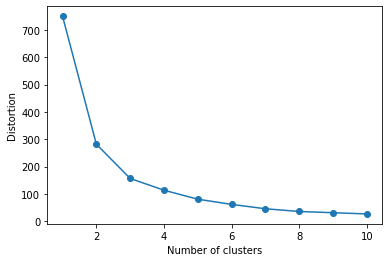

In [12]:
plot_distortion(df_standard_scaled)

In [13]:
km = KMeans(n_clusters=3,
            n_init=10,
            random_state=0)

In [14]:
y_km = km.fit_predict(df_standard_scaled)

In [15]:
df = df_standard_scaled
df['cluster'] = y_km

In [16]:
cluster_count = df.groupby('cluster').count()
cluster_count

,0,1
cluster,,
0,50,50
1,318,318
2,7,7


In [25]:
scatter_cluster = sns.scatterplot(data=df_standard_scaled,
                                  x="starting_balance",
                                  y="ending_balance",
                                  hue="Cluster")

ValueError: Could not interpret value `starting_balance` for parameter `x`

In [26]:
sns.scatterplot(x='0', y='1', hue='cluster', data=df_standard_scaled, palette='deep')
plt.title('K-means Clustering with 2 dimensions')
plt.show()

ValueError: Could not interpret value `0` for parameter `x`

In [17]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [21]:
plot_clusters(df_standard_scaled, y_km, plt_cluster_centers = True)

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False]), 0)' is an invalid key

In [22]:
df_standard_scaled

,0,1,cluster
0,-0.455825,-0.551147,1
1,-0.379088,-0.489760,1
2,-0.183319,-0.323867,1
3,-0.094864,-0.585301,1
4,-0.198297,-0.332462,1
...,...,...,...
370,-0.419867,-0.361573,1
371,-0.332503,-0.371056,1
372,-0.148753,-0.200695,1
373,-0.423989,-0.563422,1
